<a href="https://colab.research.google.com/github/ajayn3300/Movie-Recommender-content-based----NLP/blob/main/Movie_Recommender_Sytem~(Content_Based).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io
plt.rcParams["figure.figsize"] = (15,8)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Import

In [2]:
#data load
data=pd.read_csv('https://raw.githubusercontent.com/ajayn3300/Movie-Recommender-content-based----NLP/main/mymoviedb.csv',lineterminator="\n")

In [3]:
#data head
data

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


In [4]:
data.shape

(9827, 9)

In [5]:
#null values
data.isna().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [6]:
#duplicates
data.duplicated().sum()

0

In [7]:
#data description
data.describe(include='all')

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
count,9827,9827,9827,9827.000000,9827.000000,9827.000000,9827,9827,9827
unique,5893,9513,9822,NaN,NaN,NaN,43,2337,9827
top,2022-03-10,Beauty and the Beast,Wilbur the pig is scared of the end of the sea...,NaN,NaN,NaN,en,Drama,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
freq,16,4,2,NaN,NaN,NaN,7570,466,1
mean,NaN,NaN,NaN,40.326088,1392.805536,6.439534,NaN,NaN,NaN
std,NaN,NaN,NaN,108.873998,2611.206907,1.129759,NaN,NaN,NaN
min,NaN,NaN,NaN,13.354000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,16.128500,146.000000,5.900000,NaN,NaN,NaN
50%,NaN,NaN,NaN,21.199000,444.000000,6.500000,NaN,NaN,NaN
75%,NaN,NaN,NaN,35.191500,1376.000000,7.100000,NaN,NaN,NaN


In [8]:
#data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


# EDA

In [9]:
#data.sample
data.sample(3)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
2162,2019-07-21,Lego DC Batman: Family Matters,"Suspicion is on high after Batman, Batgirl, Ro...",38.517,98,7.0,en,"Animation, Family, Action, Comedy",https://image.tmdb.org/t/p/original/wPdlrMbdxt...
932,2017-06-15,Despicable Me 3,Gru and his wife Lucy must stop former '80s ch...,68.469,5901,6.4,en,"Action, Animation, Comedy, Family, Adventure",https://image.tmdb.org/t/p/original/6t3YWl7hrr...
3426,2009-11-26,Arthur and the Revenge of Maltazard,Arthur answers a distress call from Princess S...,27.370,1424,5.7,fr,"Adventure, Fantasy, Animation, Family",https://image.tmdb.org/t/p/original/rHCL0HwlQv...


In [10]:
# column "Release_date " to datetime
data['Release_Date']=pd.to_datetime(data['Release_Date'])
data

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


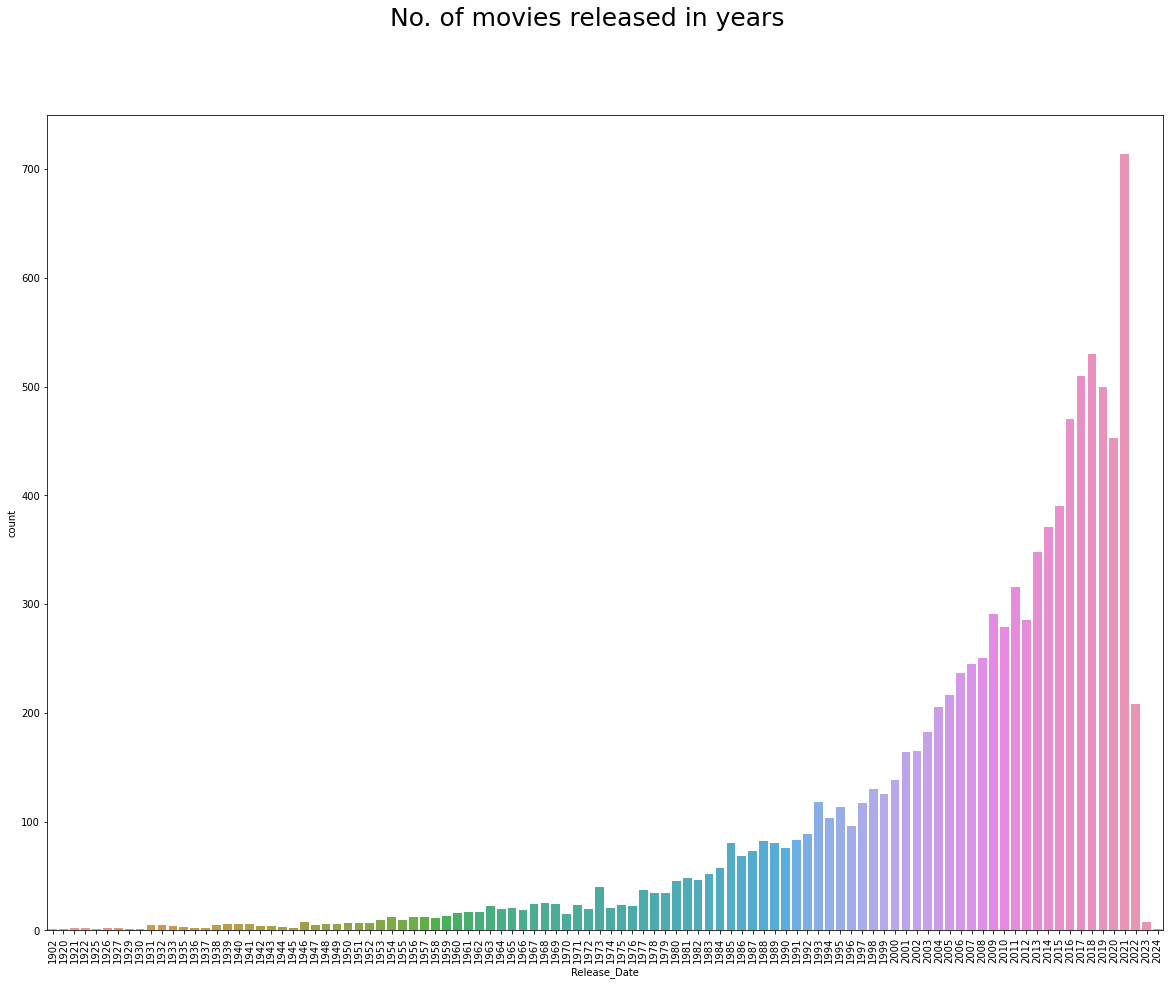

In [11]:
# no of movies release in years
plt.figure(figsize=(20,15))
sns.countplot(data.Release_Date.dt.year)
plt.xticks(rotation='vertical')
plt.suptitle('No. of movies released in years',fontsize=25)
plt.show()

          Most no. of movies were released in year 2021.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Top 10 Movies till year')

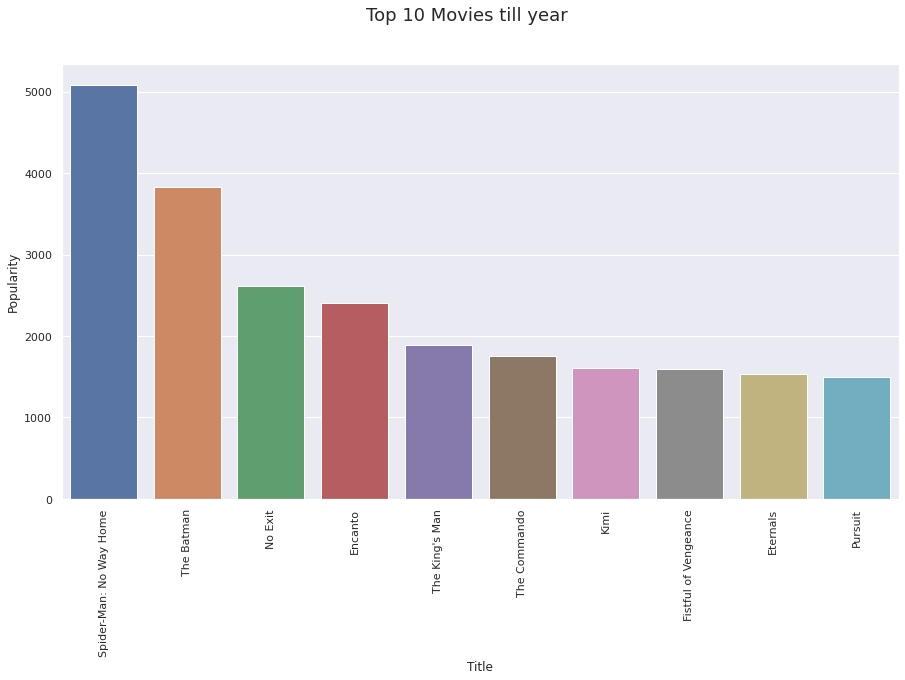

In [12]:
#top 10 movies
sns.set_theme(style="darkgrid")
sns.barplot(data.groupby('Title')['Popularity'].mean().sort_values(ascending=False).head(10).reset_index()['Title'],data.groupby('Title')['Popularity'].mean().sort_values(ascending=False).head(10).reset_index()['Popularity'])
plt.xticks(rotation='vertical')
plt.suptitle('Top 10 Movies till year',fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Languages in which most no. of movies are available')

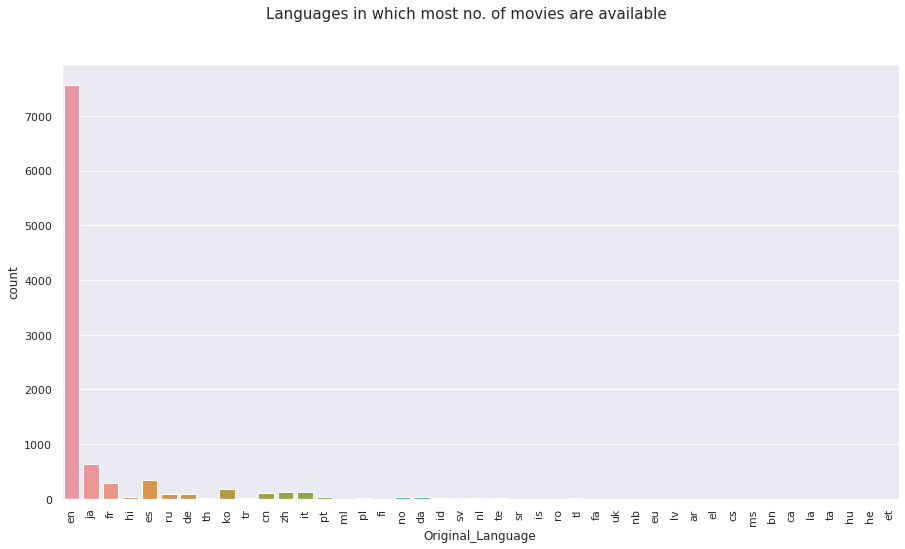

In [13]:
# in which language ,most no. of movies are available
sns.countplot(data.Original_Language)
plt.xticks(rotation='vertical')
plt.suptitle('Languages in which most no. of movies are available',fontsize=15)

      Most no. of movies are available in English language.

# Data Preprocessing

In [14]:
# let's keep only those columns which are needed
x=data.loc[:,['Title','Overview','Original_Language','Genre']]

In [15]:
# sample x
x.sample(5)

,Title,Overview,Original_Language,Genre
5154,Operation Red Sea,A squad of the Jiaolong Commando Unit - Sea Dr...,zh,"Action, Thriller, War, Drama"
3591,Wanted,Doormat Wesley Gibson discovers that his recen...,en,"Action, Thriller, Crime"
2020,Death of Me,A couple on holiday on a remote South Pacific ...,en,"Horror, Mystery"
9625,The Man Who Would Be King,A robust adventure about two British adventure...,en,"Adventure, Drama"
7348,The Hustler,Fast Eddie Felson is a small-time pool hustler...,en,Drama


In [16]:
# Let's do simple prerocess (NOTE : it won't remove stopwords)

# on Overview column
x['Overview']=x['Overview'].apply(simple_preprocess)

# on genre column
x['Genre']=x['Genre'].apply(simple_preprocess)


In [17]:
# Let's remove stopwords now
x['Overview']=x['Overview'].apply(lambda x :[i for i in x if i not in stopwords.words('english')])

In [18]:
#Let's join all the three columns so we could make sparse matrix of these features
x['all']=[' '.join(x.Overview[i])+" "+"".join(x.Original_Language[i])+' '+' '.join(x.Genre[i]) for i in range(len(x))]

In [19]:
# x  head
x.head()

,Title,Overview,Original_Language,Genre,all
0,Spider-Man: No Way Home,"[peter, parker, unmasked, longer, able, separa...",en,"[action, adventure, science, fiction]",peter parker unmasked longer able separate nor...
1,The Batman,"[second, year, fighting, crime, batman, uncove...",en,"[crime, mystery, thriller]",second year fighting crime batman uncovers cor...
2,No Exit,"[stranded, rest, stop, mountains, blizzard, re...",en,[thriller],stranded rest stop mountains blizzard recoveri...
3,Encanto,"[tale, extraordinary, family, madrigals, live,...",en,"[animation, comedy, family, fantasy]",tale extraordinary family madrigals live hidde...
4,The King's Man,"[collection, history, worst, tyrants, criminal...",en,"[action, adventure, thriller, war]",collection history worst tyrants criminal mast...


In [20]:
# Stemming
from nltk.stem import PorterStemmer

stemmer=PorterStemmer()

x['all']=x['all'].apply(lambda x:[stemmer.stem(i) for i in x.split()])

In [21]:
x['all']=x['all'].apply(lambda x :' '.join(x))

In [22]:
x

,Title,Overview,Original_Language,Genre,all
0,Spider-Man: No Way Home,"[peter, parker, unmasked, longer, able, separa...",en,"[action, adventure, science, fiction]",peter parker unmask longer abl separ normal li...
1,The Batman,"[second, year, fighting, crime, batman, uncove...",en,"[crime, mystery, thriller]",second year fight crime batman uncov corrupt g...
2,No Exit,"[stranded, rest, stop, mountains, blizzard, re...",en,[thriller],strand rest stop mountain blizzard recov addic...
3,Encanto,"[tale, extraordinary, family, madrigals, live,...",en,"[animation, comedy, family, fantasy]",tale extraordinari famili madrig live hidden m...
4,The King's Man,"[collection, history, worst, tyrants, criminal...",en,"[action, adventure, thriller, war]",collect histori worst tyrant crimin mastermind...
...,...,...,...,...,...
9822,Badlands,"[dramatization, starkweather, fugate, killing,...",en,"[drama, crime]",dramat starkweath fugat kill spree teenag girl...
9823,Violent Delights,"[female, vampire, falls, love, man, met, bar, ...",es,[horror],femal vampir fall love man met bar male vampir...
9824,The Offering,"[young, successful, reporter, jamie, finds, si...",en,"[mystery, thriller, horror]",young success report jami find sister die myst...
9825,The United States vs. Billie Holiday,"[billie, holiday, spent, much, career, adored,...",en,"[music, drama, history]",billi holiday spent much career ador fan gover...


# Text Vectorizer

In [23]:
# importing library for text vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#initiating class
vectorizer=TfidfVectorizer(max_features=5000)

In [26]:
# vectorizing
vector=vectorizer.fit_transform(x['all']).toarray()

# Calculating Cosine Similarity

In [27]:
# for calculating correlation
from sklearn.metrics.pairwise import cosine_similarity

In [30]:
# saving correlation arrays
corr=cosine_similarity(vector)

In [40]:
#saving into dataframe with same indices as movie dataframe
corr=pd.DataFrame(corr,index=x.index,columns=x.index)

# Creating a function for **Recommender System**

In [100]:
def recommender(movie):
  # get index first
  indexed=x[x['Title']==movie].index[0]

  # get top 10 movies
  top_10=list(corr.loc[:,indexed].sort_values(ascending=False)[1:11].index)

  #plot images
  for i,j in enumerate(top_10):
    plt.figure(i+1)
    img_vec=io.imread(data['Poster_Url'][j])
    plt.imshow(img_vec)
    plt.xlabel(data.Title[j])

# Let's test our **Recommender System**

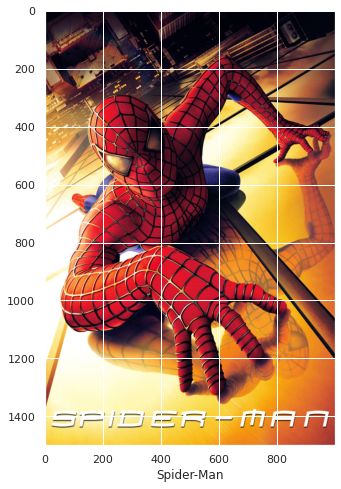

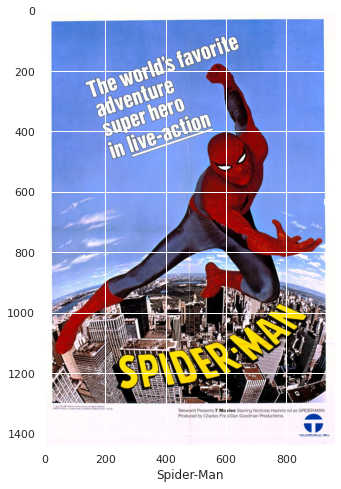

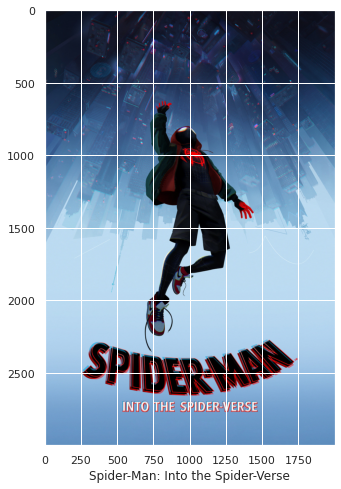

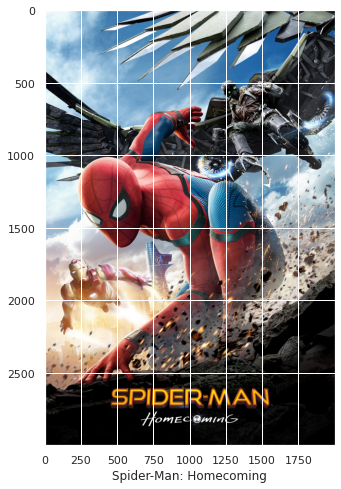

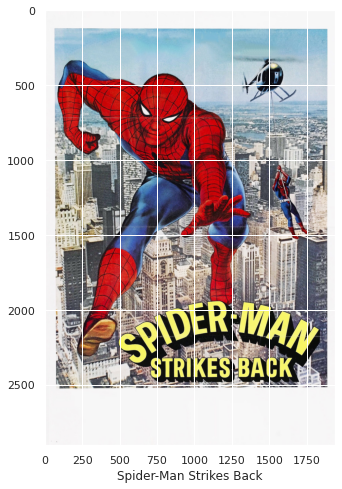

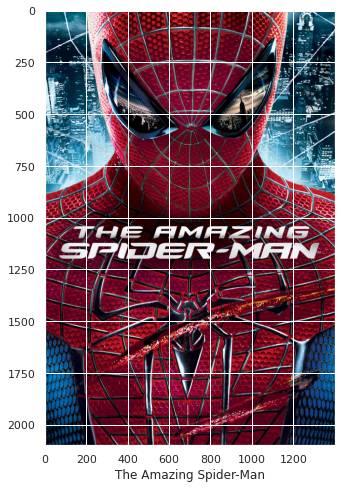

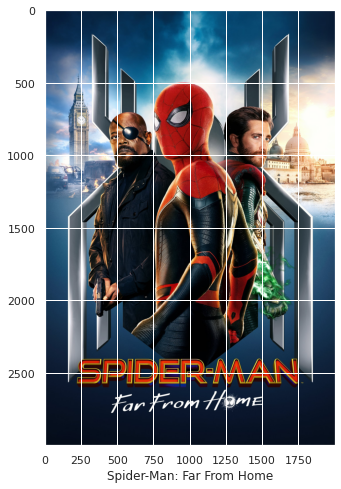

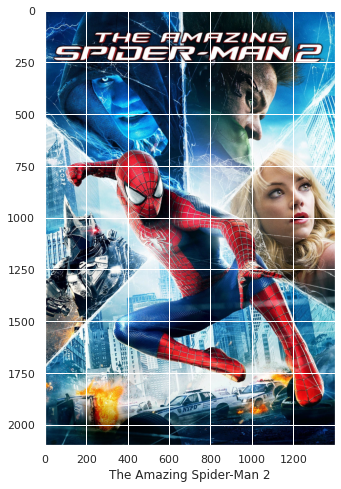

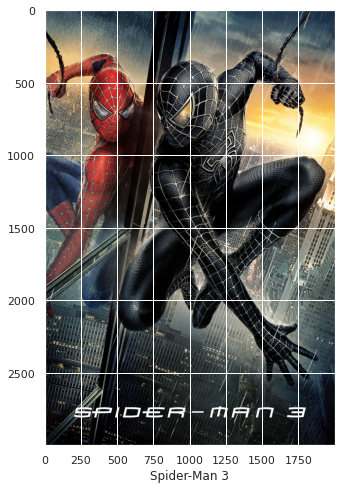

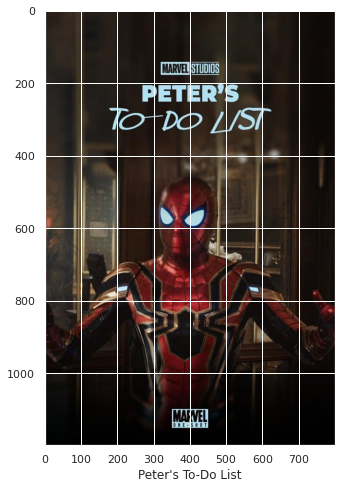

In [108]:
# let's test
recommender('Spider-Man: No Way Home')

***Working Great !***